In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'May 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29
2019-03-31     2938   2223         86   2   0     9    149     190      28
2019-04-30     2994   2174         38   5   0     2     78     156      13
2019-05-31     2902   2059         22   1   0     6    117     143      16

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-05-31      -92   -115        -16  -4   0     4     39     -13       3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

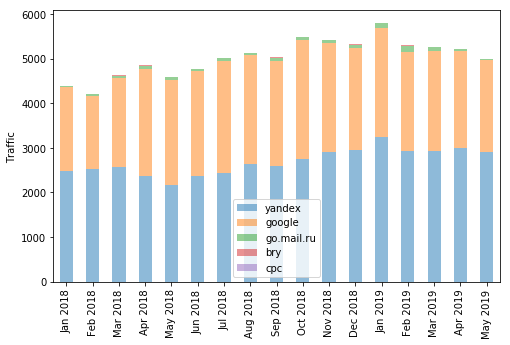

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

<h3>Линейная диаграмма изменений трафика</h3>

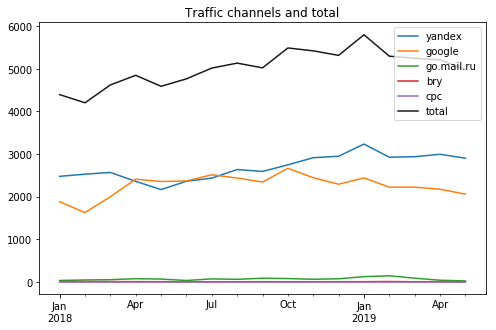

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)     22
google     0                                         дешевые двери    294
           1                                          двери дешево    284
           2                                       двери из дерева    118
           3                             np - /?cnt=catalog&r=2438     48
           4                                      np - /?pid=pokaz     35
           5                             np - /?cnt=catalog&r=1428     34
           6                                дверные полотна купить     33
           7                                         двери продажа     20
           8                                         полотно двери     19
           9                                                np - /     17
           10                                        двери полотно     11
           11                                      недорогие двери     11
           12                                       двери в ванную      9
           13                               дверное полотно дешево      9
           14                                      полотна дверные      9
           15                                      двери комнатные      7
           16                                 полотно дверное цена      7
           17                                    полотно для двери      7
           18                            np - /?cnt=catalog&r=2052      4
           19                                     двери с коробкой      4
           20                                 дверное полотно цена      4
           21                             np - /?cnt=catalog&r=763      3
           22           np - /?pid=derevyannye-mezhkomnatnye-dveri      3
           23                                   np - /?pid=service      3
           24                                      дверное полотно      3
           25                            np - /?cnt=catalog&r=1452      2
           26                            np - /?cnt=catalog&r=2495      2
           27                              np - /?pid=menu-katalog      2
           28                                       двери из сосны      2
...                                                            ...    ...
yandex     2044  активатор двери багажника купить в москве инте...      1
           2045  акустикафилипс6494 дверное полотно zadoor прат...      1
           2046  акции волховец скидка 20 на дверное полотно от...      1
           2047                        акции на двери эмаль графит      1
           2048  александрийские двери коробка дверное полотно ...      1
           2049  александрийские двери коробка дверное полотно ...      1
           2050             александрийские двери официальный сайт      1
           2051  александрийские двери официальный сайт каталог...      1
           2052                        александрийские двери эмаль      1
           2053  александровская гимназия акатово сайт день отк...      1
           2054         александровские двери каролина эмаль белая      1
           2055  александровские двери межкомнатные дверное пол...      1
           2056  александровские двери межкомнатные официальный...      1
           2057      александровские окна и двери официальный сайт      1
           2058  александровский оконный завод нальчик двери ка...      1
           2059                           аликанте дверное полотно      1
           2060  алиса установка дверей на кухню комнатные цены...      1
           2061                     аллегро двери официальный сайт      1
           2062                     альберо двери официальный сайт      1
           2063                     альверо двери официальный сайт      1
           2064            альмера классик механизм дверного замка      1
           2065                        альтернатива двери на кухню      1
           2066                альтернатива двери официальный с

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),22
google,дешевые двери,294
rambler,двери складные гармошка,1
yandex,дверь гармошка,151


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                    (not set)     22
google     0                дешевые двери    294
           1                 двери дешево    284
           2              двери из дерева    118
           3    np - /?cnt=catalog&r=2438     48
           4             np - /?pid=pokaz     35
rambler    0      двери складные гармошка      1
yandex     1               дверь гармошка    151
           2               двери гармошка     73
           0                    (not set)     47
           3  двери гармошка межкомнатные     34
           5  дверь гармошка леруа мерлен     29